# Notebook's content
1. [Loading Data](#0)
2. [Pre-processing](#1)
3. [XGBRegressor](#2)
3. [Model Evaluation](#3)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import random
import tempfile
import gc
gc.collect()

0

<a id="0"></a> <br>
# Loading Data

In [2]:
df = pd.read_csv('/kaggle/input/crop-yield-prediction-dataset/yield_df.csv')

In [3]:
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


<a id="1"></a> <br>
# Pre-processing


In [4]:
df = df.fillna(df.median())
df = df.fillna(df.mode().iloc[0])
df = df.drop_duplicates()


/tmp/ipykernel_23/2694430884.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [5]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame called "df" with categorical columns to label encode
categorical_cols = ['Area', 'Item']

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each categorical column and label encode it
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# The categorical columns are now label encoded in the DataFrame


In [6]:
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,0,1,1990,36613,1485.0,121.00,16.37
1,1,0,3,1990,66667,1485.0,121.00,16.37
2,2,0,4,1990,23333,1485.0,121.00,16.37
3,3,0,5,1990,12500,1485.0,121.00,16.37
4,4,0,6,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,100,4,2013,22581,657.0,2550.07,19.76
28238,28238,100,5,2013,3066,657.0,2550.07,19.76
28239,28239,100,6,2013,13142,657.0,2550.07,19.76
28240,28240,100,7,2013,22222,657.0,2550.07,19.76


In [7]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.00,16.37
1,0,3,1990,66667,1485.0,121.00,16.37
2,0,4,1990,23333,1485.0,121.00,16.37
3,0,5,1990,12500,1485.0,121.00,16.37
4,0,6,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,100,4,2013,22581,657.0,2550.07,19.76
28238,100,5,2013,3066,657.0,2550.07,19.76
28239,100,6,2013,13142,657.0,2550.07,19.76
28240,100,7,2013,22222,657.0,2550.07,19.76


In [8]:
corr_matrix = df.corr()

# Find highly correlated features
highly_correlated_features = []
threshold = 0.7  # Adjust the threshold as desired

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            # Append the correlated feature pair
            feature_i = corr_matrix.columns[i]
            feature_j = corr_matrix.columns[j]
            correlation = corr_matrix.iloc[i, j]
            highly_correlated_features.append((feature_i, feature_j, correlation))

# Print the highly correlated features
for feature_i, feature_j, correlation in highly_correlated_features:
    print(f"{feature_i} and {feature_j} are highly correlated: {correlation}")

In [9]:

X = df.drop(['hg/ha_yield'], axis=1)
y = df['hg/ha_yield']

In [10]:
from sklearn.model_selection import train_test_split


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
X_test

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
25564,85,4,2008,636.0,40719.00,17.21
18113,56,8,1996,1513.0,152.01,19.71
25607,85,5,2010,636.0,39043.00,16.51
6815,22,3,2007,3240.0,82439.06,27.45
18144,56,7,2000,1513.0,130.46,19.65
...,...,...,...,...,...,...
4149,14,3,2007,1761.0,304031.00,20.93
8769,32,6,1992,867.0,85249.00,11.15
10128,39,0,2010,1440.0,27.85,27.19
20433,62,7,2013,758.0,59920.18,25.36


<a id="2"></a> <br>
# XGBClassifier


In [12]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score


In [13]:
mmc = MinMaxScaler()
X_train = mmc.fit_transform(X_train)
X_test = mmc.transform(X_test)

In [14]:
from xgboost import XGBRegressor
XG_boost = XGBRegressor(max_depth = 3,n_estimators = 300 )

XG_boost.fit(X_train , y_train)
y_pred = XG_boost.predict(X_test)
XG_rmse = mean_squared_error(y_test,y_pred)
XG_R2 = r2_score(y_test,y_pred)
Model_perf = pd.DataFrame(columns=['Model_Name','MSE','R2_Score'])

new_row = {'Model_Name':'XGB','MSE':XG_rmse ,'R2_Score': XG_R2}
Model_perf = Model_perf.append(new_row,ignore_index = True)
print("Predicted values:", y_pred)


Predicted values: [ 73630.45     696.338  38991.78  ...  58113.9   179546.98   23965.168]


/tmp/ipykernel_23/4210618630.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_perf = Model_perf.append(new_row,ignore_index = True)


In [15]:
Model_perf 

,Model_Name,MSE,R2_Score
0,XGB,5.242873e+08,0.928251


<a id="3"></a> <br>
# Model Evaluation


In [16]:
from sklearn.metrics import accuracy_score

# Make predictions on the testing data
y_pred = XG_boost.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 524287347.45147437


f0: 0.49345308542251587
f2: 0.13801957666873932
f5: 0.12277138978242874
f1: 0.0912562757730484
f4: 0.09086477756500244
f3: 0.06363489478826523


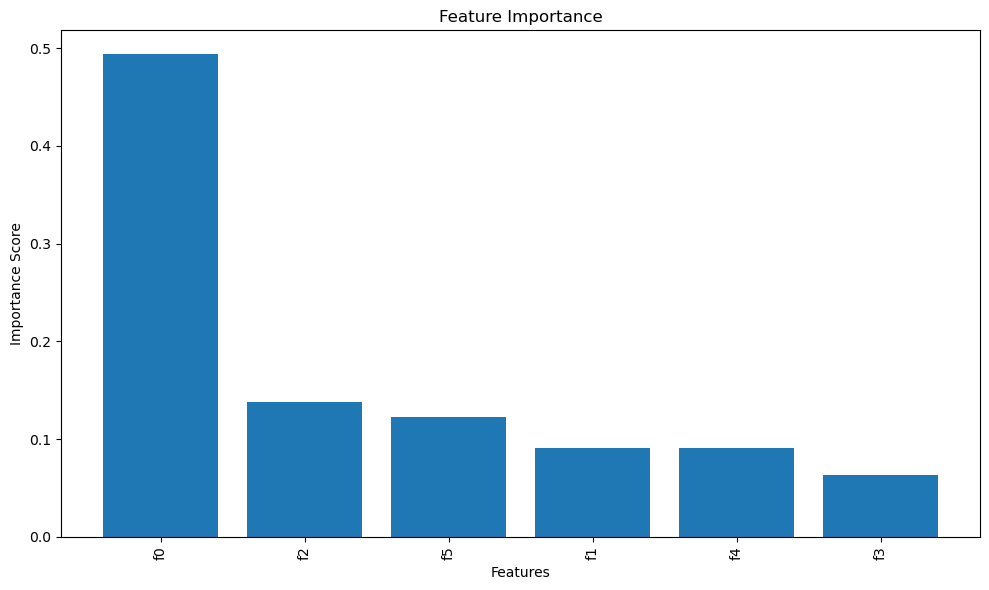

In [17]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained an XGBoost model and assigned it to the variable 'model'
# If not, you need to train an XGBoost model before running the code below

# Retrieve feature importance scores from the trained model
importance_scores = XG_boost.feature_importances_

# Initialize feature names variable
feature_names = None

# Check if feature names are available
if hasattr(XG_boost, 'feature_names_'):
    feature_names = XG_boost.feature_names_
else:
    # Retrieve feature names from the input data structure used for training
    if isinstance(XG_boost.get_booster().get_score(importance_type='weight'), dict):
        # If you trained the model using a pandas DataFrame
        sorted_features = sorted(XG_boost.get_booster().get_score(importance_type='weight').items(), key=lambda x: x[1], reverse=True)
        feature_names = [f[0] for f in sorted_features]

# Sort the feature importance scores and feature names in descending order
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_scores = importance_scores[sorted_indices]
sorted_names = [feature_names[i] if feature_names and i < len(feature_names) else f'Feature {i}' for i in sorted_indices]

# Print the feature importance scores and names
for score, name in zip(sorted_scores, sorted_names):
    print(f"{name}: {score}")

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_scores)), sorted_scores, tick_label=sorted_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [18]:
import pickle

# Assuming you have trained and obtained the XGB model called "model"

# Save the model to a file
filename = '/kaggle/working/xgb_model.sav'
pickle.dump(XG_boost, open(filename, 'wb'))

In [19]:
loaded_model = pickle.load(open(filename, 'rb'))
